<a href="https://colab.research.google.com/github/soyoonjeong/Dacon/blob/main/%E1%84%8B%E1%85%A7%E1%86%BC%E1%84%92%E1%85%AA_%E1%84%80%E1%85%AA%E1%86%AB%E1%84%80%E1%85%A2%E1%86%A8%E1%84%89%E1%85%AE_%E1%84%8B%E1%85%A8%E1%84%8E%E1%85%B3%E1%86%A8_%E1%84%86%E1%85%A9%E1%84%83%E1%85%A6%E1%86%AF_%E1%84%80%E1%85%A2%E1%84%87%E1%85%A1%E1%86%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

title : 영화의 제목<br>
distributor : 배급사<br>
genre : 장르<br>
release_time : 개봉일<br>
time : 상영시간(분)<br>
screening_rat : 상영등급<br>
director : 감독이름<br>
dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)<br>
dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)<br>
num_staff : 스텝수<br>
num_actor : 주연배우수<br>
box_off_num : 관객수

# 1. EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("/content/drive/MyDrive/datasets/영화 관객수/movies_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/datasets/영화 관객수/movies_test.csv")

In [3]:
train_data.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [4]:
train_data.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [5]:
print(train_data.shape)
print(test_data.shape)

(600, 12)
(243, 11)


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


ㄴ> dir_prev_bfnum에 null 값이 있음

In [7]:
pd.options.display.float_format = '{:.1f}'.format # e+ 이런식으로 나타나게 해주지 않는 코드

In [8]:
train_data.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [9]:
pd.reset_option('display.float_format')

In [10]:
train_data.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


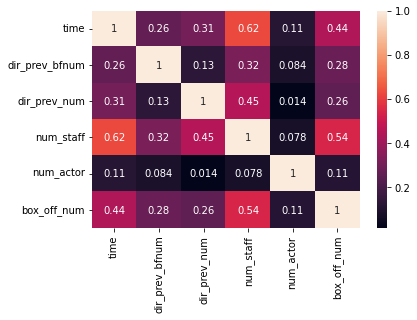

In [11]:
import seaborn as sns
sns.heatmap(train_data.corr(), annot=True)

스태프의 수와 관객수가 높은 상관관계를 보이고 있다! <br>
영화 상영시간과 관객수도 비교적 높은 상관관계를 보이고 있다 <br>

# 2. 전처리

In [12]:
train_data.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [13]:
train_data[train_data['dir_prev_num']==0].shape

(330, 12)

In [14]:
# 이전 관객수 : 이전 영화수가 0이면 이전 관객수도 0으로 바꿈
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)
train_data.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [15]:
train_data['distributor'].value_counts() 

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [16]:
# 배급사 : 상위 5개 제외 다 '기타'로 바꿈
distributor_list = train_data['distributor'].value_counts()[:5]
def changeDistributor(distributor):
  if distributor in distributor_list:
    return distributor
  else:
    return '기타'
train_data['distributor'] = train_data['distributor'].apply(lambda x:changeDistributor(x))
test_data['distributor'] = test_data['distributor'].apply(lambda x:changeDistributor(x))

In [17]:
train_data['distributor'].value_counts()

기타           409
CJ 엔터테인먼트     54
롯데엔터테인먼트      52
(주)NEW        30
(주)마운틴픽쳐스     29
(주)쇼박스        26
Name: distributor, dtype: int64

In [18]:
from sklearn import preprocessing

In [24]:
# 배급사 : 숫자로 나타냄
le = preprocessing.LabelEncoder()
train_data['distributor'] = le.fit_transform(train_data['distributor'])
test_data['distributor'] = le.transform(test_data['distributor'])

In [30]:
# 장르 : 숫자로 나타냄 
le = preprocessing.LabelEncoder()
train_data['genre'] = le.fit_transform(train_data['genre'])
test_data['genre'] = le.transform(test_data['genre'])

In [26]:
# 상영등급 : 숫자로 나타냄
le = preprocessing.LabelEncoder()
train_data['screening_rat'] = le.fit_transform(train_data['screening_rat'])
test_data['screening_rat'] = le.transform(test_data['screening_rat'])

In [27]:
train_data['screening_rat'].value_counts()

3    204
1    202
0    102
2     92
Name: screening_rat, dtype: int64

In [28]:
# 개봉일 : 다양하므로 년, 월이라는 새로운 특성 만듦
train_data['year'] = train_data['release_time'].apply(lambda x: int(x[:4]))
train_data['month'] = train_data['release_time'].apply(lambda x: int(x[5:7]))
train_data.drop(['release_time'], axis = 1, inplace=True)

test_data['year'] = test_data['release_time'].apply(lambda x: int(x[:4]))
test_data['month'] = test_data['release_time'].apply(lambda x: int(x[5:7]))
test_data.drop(['release_time'], axis = 1, inplace=True)

In [31]:
train_data.head()

,title,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,5,10,96,3,조병옥,0.00,0,91,2,23398,2012,11
1,내부자들,2,2,130,3,우민호,1161602.50,2,387,3,7072501,2015,11
2,은밀하게 위대하게,2,10,123,1,장철수,220775.25,4,343,4,6959083,2013,6
3,나는 공무원이다,0,11,101,2,구자홍,23894.00,2,20,6,217866,2012,7
4,불량남녀,4,11,108,1,신근호,1.00,1,251,2,483387,2010,11


In [33]:
import seaborn as sns
train_data.corr()['box_off_num'].sort_values(ascending=False)

box_off_num       1.000000
num_staff         0.544265
time              0.441452
dir_prev_bfnum    0.293791
dir_prev_num      0.259674
num_actor         0.111179
genre             0.085874
month             0.019104
year             -0.002497
screening_rat    -0.169423
distributor      -0.238367
Name: box_off_num, dtype: float64

# 모델링

In [34]:
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state = 49, n_estimator = 1000) 
# lightgbm 사용 : 1000번 반복하며 1000개의 약한 분류기 학습
# 부스팅 : 여러 개의 분류기가 순차적으로 학습을 수행하되 
# 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록
# 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행 

In [35]:
features = ['time','dir_prev_num', 'dir_prev_bfnum', 'genre', 'num_staff','num_actor']
target = ['box_off_num']

In [36]:
X_train, X_test, y_train = train_data[features], test_data[features], train_data[target] # 훈련용 데이터와 테스트 데이터 나눔

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate' : [0.1,0.01,0.003],
    'min_child_samples' : [20,30]}
gs = GridSearchCV(estimator = model,
                  param_grid = params,
                  scoring='neg_mean_squared_error',
                  cv = 5)

In [38]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(n_estimator=1000, random_state=49),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [39]:
scores_df = pd.DataFrame(gs.cv_results_)
scores_df[['params','mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.1, 'min_child_samples': 20}",-2.332197e+12,4
1,"{'learning_rate': 0.1, 'min_child_samples': 30}",-2.249349e+12,1
2,"{'learning_rate': 0.01, 'min_child_samples': 20}",-2.319108e+12,3
3,"{'learning_rate': 0.01, 'min_child_samples': 30}",-2.306146e+12,2
4,"{'learning_rate': 0.003, 'min_child_samples': 20}",-2.796647e+12,5
5,"{'learning_rate': 0.003, 'min_child_samples': 30}",-2.815349e+12,6


In [40]:
gs.best_params_

{'learning_rate': 0.1, 'min_child_samples': 30}

In [41]:
model = lgb.LGBMRegressor(random_state = 49, n_estimator = 1000, learning_rate = 0.1, min_child_samples = 30) 

In [42]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 49) # kfold 사용

In [43]:
models = []
for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]
  models.append(model.fit(x_t, y_t, eval_set = (x_val, y_val), early_stopping_rounds=100, verbose = 100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 3.72941e+12
Did not meet early stopping. Best iteration is:
[21]	valid_0's l2: 3.27869e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.89553e+12
Did not meet early stopping. Best iteration is:
[21]	valid_0's l2: 2.78997e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.60264e+12
Did not meet early stopping. Best iteration is:
[36]	valid_0's l2: 1.56828e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.11665e+12
Did not meet early stopping. Best iteration is:
[17]	valid_0's l2: 2.03648e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.80104e+12
Did not meet early stopping. Best iteration is:
[17]	valid_0's l2: 1.55357e+12


In [44]:
preds = []
for model in models:
  preds.append(model.predict(X_test))

In [45]:
gs.best_score_

-2249348898159.8877

In [46]:
submission = pd.read_csv('/content/drive/MyDrive/datasets/영화 관객수/submission.csv')

In [47]:
movie = submission.copy()

In [48]:
movie['box_off_num'] = np.mean(preds, axis = 0)

In [49]:
movie.to_csv('movie.csv', index = False)